In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
import networkx as nx
from IPython.display import Image, HTML

import laUtilities as ut

%matplotlib inline

# Introduction to Networks

Now we will encounter a new kind of data: __networks__, also called __graphs.__

(We're going to use the two terms interchangeably).

## Basic Definitions

A graph is a pair $(V, E)$ where $V$ is a set of __vertices__ and $E$ is a set of vertex pairs called __edges.__

We'll also use the term __nodes__ for vertices,

and we'll use the term __links__ for edges.

We'll distinguish between __undirected__ graphs and __directed__ graphs.

In an underdirected graph, an edge $(u, v)$ is an unordered pair.  The edge $(v, u)$ is the same thing.

In a directed graph, $(u, v)$ is an ordered pair, and it is different from $(v, u)$.

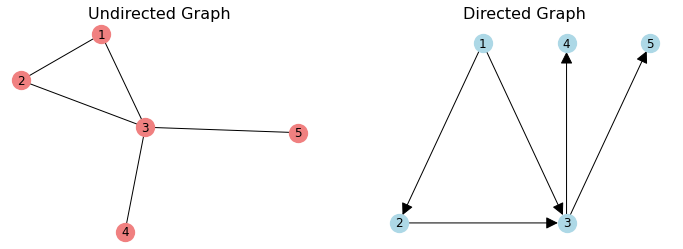

In [2]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2, 3), (3, 4), (3, 5)])
DG = nx.DiGraph()
DG.add_edges_from([(1,2), (1,3), (2, 3), (3, 4), (3, 5)])
pos = {
    1: [0, 0],
    2: [-1, -1],
    3: [1, -1],
    4: [1, 0],
    5: [2, 0]
}
fig = plt.figure(figsize = (12, 4))
ax1 = fig.add_subplot(121)
nx.draw_networkx(G, 
                 ax = ax1,
                 node_size=300, 
                 edge_color='k',
                 node_color = 'lightcoral', 
                 pos = nx.spring_layout(G, seed = 1),
                 with_labels=True, 
                 alpha=1, linewidths=2)
plt.axis('off')
plt.title('Undirected Graph', size = 16)
ax2 = fig.add_subplot(122)
nx.draw_networkx(DG, 
                 ax = ax2,
                 node_size=300, 
                 edge_color='k',
                 node_color = 'lightblue',
                 pos = pos,
                 with_labels=True, 
                 arrowsize = 25,
                 alpha=1, linewidths=2)
plt.title('Directed Graph', size = 16)
plt.axis('off');

A __path__ in a graph from $u$ to $v$ is a sequence of edges that starts at $u$ and ends at $v$.

In a directed graph, all of the edges in a path need to be oriented head-to-tail.

If there is a path from $u$ to $v$, we say that $v$ is __reachable__ from $u$.

### Degree

The __degree__ of a node is the number of edges that connect to it.

In a directed graph, we distinguish between:
* __in-degree__: the number of incoming edges to the node
* __out-degree__: the number of outgoing edges to the node

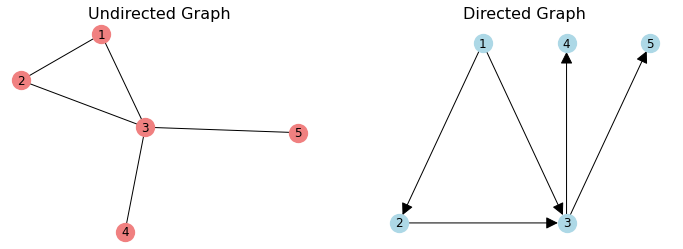

In [3]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2, 3), (3, 4), (3, 5)])
DG = nx.DiGraph()
DG.add_edges_from([(1,2), (1,3), (2, 3), (3, 4), (3, 5)])
pos = {
    1: [0, 0],
    2: [-1, -1],
    3: [1, -1],
    4: [1, 0],
    5: [2, 0]
}
fig = plt.figure(figsize = (12, 4))
ax1 = fig.add_subplot(121)
nx.draw_networkx(G, 
                 ax = ax1,
                 node_size=300, 
                 edge_color='k',
                 node_color = 'lightcoral', 
                 pos = nx.spring_layout(G, seed = 1),
                 with_labels=True, 
                 alpha=1, linewidths=2)
plt.axis('off')
plt.title('Undirected Graph', size = 16)
ax2 = fig.add_subplot(122)
nx.draw_networkx(DG, 
                 ax = ax2,
                 node_size=300, 
                 edge_color='k',
                 node_color = 'lightblue',
                 pos = pos,
                 with_labels=True, 
                 arrowsize = 25,
                 alpha=1, linewidths=2)
plt.title('Directed Graph', size = 16)
plt.axis('off');

The __neighbors__ of a node are the nodes to which it is connected.

So the degree of a node is the number of neighbors it has.

Node that in a network with $n$ nodes and $e$ edges, the average node degree is $2e/n$.  

Make sure that this is obvious to you!

### Connectivity

The first question to ask about a graph is: is it __connected__?

For an undirected graph to be connected, for each pair of nodes $(u, v)$, $u$ is reachable from $v$.

We say a directed graph is connected when its undirected version is connected.

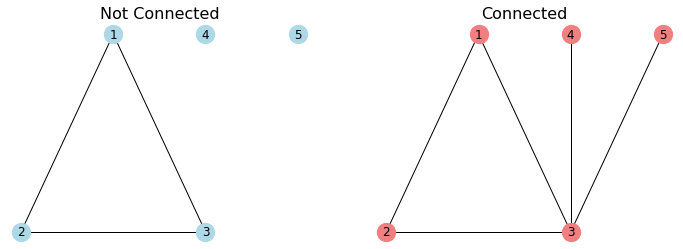

In [4]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2, 3)])
G.add_node(4)
G.add_node(5)
DG = nx.Graph()
DG.add_edges_from([(1,2), (3, 1), (2, 3), (3, 4), (3, 5)])
pos = {
    1: [0, 0],
    2: [-1, -1],
    3: [1, -1],
    4: [1, 0],
    5: [2, 0]
}
fig = plt.figure(figsize = (12, 4))
ax1 = fig.add_subplot(121)
nx.draw_networkx(G, 
                 ax = ax1,
                 node_size=300, 
                 edge_color='k',
                 node_color = 'lightblue', 
                 pos = pos,
                 with_labels=True, 
                 arrowsize = 25,
                 alpha=1, linewidths=2)
plt.axis('off')
plt.title('Not Connected', size = 16)
ax2 = fig.add_subplot(122)
nx.draw_networkx(DG, 
                 ax = ax2,
                 node_size=300, 
                 edge_color='k',
                 node_color = 'lightcoral',
                 pos = pos,
                 with_labels=True, 
                 arrowsize = 25,
                 alpha=1, linewidths=2)
plt.title('Connected', size = 16)
plt.axis('off');

If the graph is not connected, it may contain __connected components__.   

A connected component is a subgraph that is connected.

In a directed graph, we can also ask if it is __strongly connected.__

A directed graph is strongly connected if there is a (directed) path between any two nodes.

That is, any node is reachable from any other node.

Within a directed graph, only a subset of nodes may be strongly connected.

These are called the __strongly connected component__ (SCC).

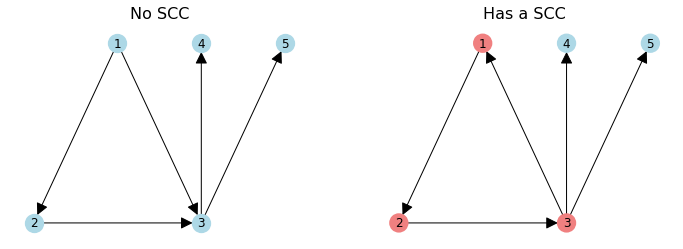

In [5]:
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3), (2, 3), (3, 4), (3, 5)])
DG = nx.DiGraph()
DG.add_edges_from([(1,2), (3, 1), (2, 3), (3, 4), (3, 5)])
pos = {
    1: [0, 0],
    2: [-1, -1],
    3: [1, -1],
    4: [1, 0],
    5: [2, 0]
}
fig = plt.figure(figsize = (12, 4))
ax1 = fig.add_subplot(121)
nx.draw_networkx(G, 
                 ax = ax1,
                 node_size=300, 
                 edge_color='k',
                 node_color = 'lightblue', 
                 pos = pos,
                 with_labels=True, 
                 arrowsize = 25,
                 alpha=1, linewidths=2)
plt.axis('off')
plt.title('No SCC', size = 16)
ax2 = fig.add_subplot(122)
nx.draw_networkx(DG, 
                 ax = ax2,
                 node_size=300, 
                 edge_color='k',
                 node_color = ['lightcoral', 'lightcoral', 'lightcoral', 'lightblue', 'lightblue'],
                 pos = pos,
                 with_labels=True, 
                 arrowsize = 25,
                 alpha=1, linewidths=2)
plt.title('Has a SCC', size = 16)
plt.axis('off');

## Characterizing Graphs

When you first start working with a network, there are some basic questions that are very helpful to ask.

It is helpful to characterize the degrees, components, and other structures in the graph.

### Comparison Case: the $G(n, p)$ Random Graph

In studying real-world graphs, it is helpful to have a case to compare against.

The most common comparison is the __$G(n, p)$ random graph__.   It is also called the __Erdős–Rényi__ graph, after the two mathematicians who developed and studied it.

The $G(n, p)$ random graph model is very simple:  
* we start with a set of $n$ nodes
* for each pair of nodes, we connect them with probability $p$.

It is easy to see that in this graph, the average node degree is $np$.

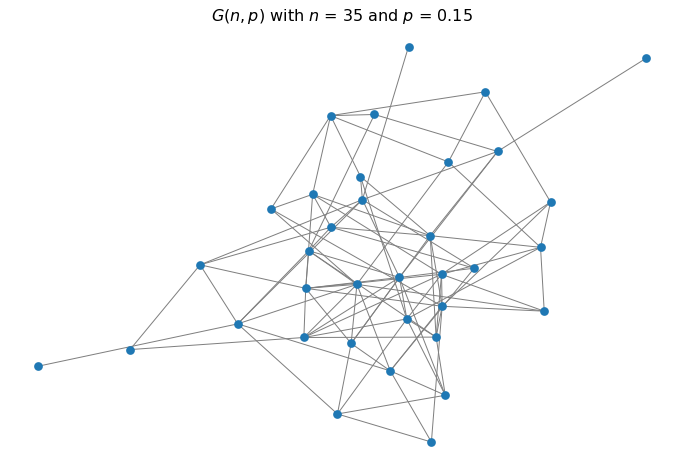

In [6]:
n = 35
p = 0.15
er = nx.erdos_renyi_graph(n, p, seed = 0)
plt.figure(figsize = (12, 8))
nx.draw_networkx(er, node_size=45, 
                 edge_color='gray', 
                 pos = nx.spring_layout(er, seed = 1),
                 with_labels=False, alpha=1, linewidths=2)
plt.axis('off')
plt.title(f'$G(n, p)$ with $n$ = {n} and $p$ = {p:0.2f}', size = 16);

In this graph, the average degree is $np = 35 \cdot 0.15 = 5.25$

As it turns out, most real-world graphs do __not__ match the properties of $G(n, p)$ graphs.  

But it is useful to have a comparison to a "random" graph.

### Degree Distributions

Understanding connectivity starts with asking about observed degrees in the graph.

This is captured in the __degree distribution.__

$$ P[D > x] = \text{probability that a node has degree at least } x $$

We typically focus our attention on large values of $x$ -- nodes that are highly connected.

#### Power Law Degree Distributions

It's common for a degree distribution to __approximately__ follow a power-law.

The simplest power-law distribution is called the Pareto distribution:

$$ P[D > x] = k^{\alpha} x^{-\alpha}\;\;\; k \leq x,\; \;0 < \alpha
\leq 2. $$

It takes on values in the range $[k, \infty]$. 

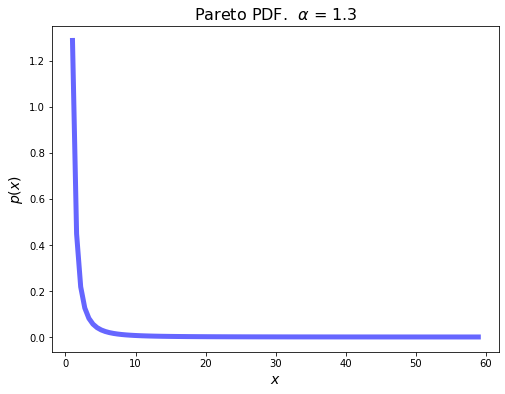

In [7]:
from scipy.stats import pareto
alpha = 1.3
x = np.linspace(pareto.ppf(0.005,alpha), pareto.ppf(0.995,alpha), 100)
plt.figure(figsize = (8, 6))
plt.plot(x, pareto.pdf(x,alpha),'b-', lw = 5, alpha = 0.6, label='pareto pdf')
plt.title(r'Pareto PDF.  $\alpha$ = {}'.format(alpha), size=16)
plt.xlabel('$x$', size=14)
plt.ylabel('$p(x)$', size=14);

We've seen distributions like this before when looking at recommender system data.

In a distribution like this, almost all values are very small, 

but there is a non-negligible fraction of values that are __very__ large.

This is like "grains of sand" mixed with a few "boulders."

This is also referred to as "elephants and mice."

What does this mean for node degree?

It means that 
* most nodes have __few neighbors,__ but
* an important small subset of nodes have __many, many neighbors.__

To capture such high-variable degree distributions, a common strategy is to plot them on __log-log__ axes.

On log-log axes, a Pareto distribution appears as a straight line:

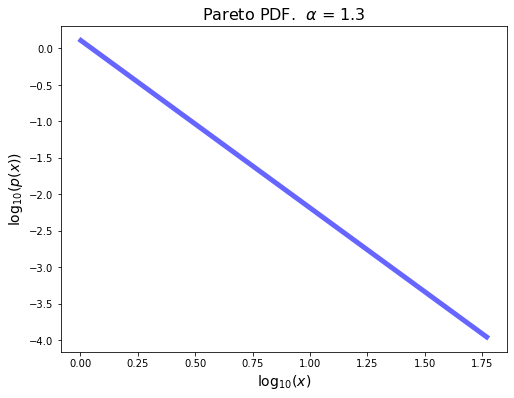

In [8]:
from scipy.stats import pareto
alpha = 1.3
plt.figure(figsize = (8, 6))
x = np.linspace(pareto.ppf(0.005,alpha), pareto.ppf(0.995,alpha), 100)
plt.plot(np.log10(x), np.log10(pareto.pdf(x,alpha)),'b-', lw = 5, alpha = 0.6, label='pareto pdf')
plt.title(r'Pareto PDF.  $\alpha$ = {}'.format(alpha), size=16)
plt.xlabel('$\log_{10}(x)$', size=14)
plt.ylabel('$\log_{10}(p(x))$', size=14);

#### Power Law Degree Distributions are Ubiquitous

<center>
    
<img src="figs/L21-newman-powerlaws.png" alt="Figure" width="800px">
    
</center>

> The networks shown are: (a) the collaboration network of mathematicians [182]; (b) citations between 1981 and 1997 to all papers cataloged by the Institute for Scientific Information [351]; (c) a 300 million vertex subset of the World Wide Web, circa 1999 [74]; (d) the Internet at the level of autonomous systems, April 1999 [86]; (e) the power grid of the western United States [416]; (f) the interaction network of proteins in the metabolism of the yeast S. Cerevisiae [212]. 
>
> _The structure and function of complex networks,_ M. E. J. Newman
>
> https://arxiv.org/abs/cond-mat/0303516


Note that $G(n, p)$ random graphs do __not__ have power-law degree distributions.

Their degree distributions have exponential tails (like the power grid example above.)

### Clustering

The next important property of a network to understand is __clustering__.  

In the context of networks, clustering refers to the tendency for groups of nodes to have higher connectivity within the group than the network-wide average.

The simplest measure of local clustering is __clustering coefficient__.

The clustering coefficient is the answer to the question "are my friends themselves friends?"

In other words, do the neighbors of a node tend to be neighbors?

More specifically, clustering coefficient measures the __probability that two of your neighbors are connected.__ 

There are two ways one can measure this:

$$C^{(1)} = \frac{\sum_i \text{number of triangles that include }i}{\sum_i \text{number of pairs of neigbors of }i} $$

This is the ratio of the mean triangle count to mean neighbor pair count.

It is the probability that a __random pair__ of neighbors are connected.

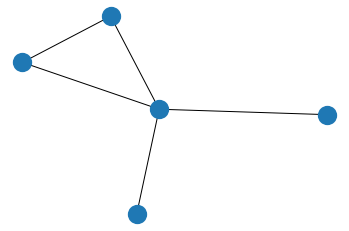

In [9]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2, 3), (3, 4), (3, 5)])
plt.figure(figsize = (6, 4))
nx.draw_networkx(G, node_size=300, 
                 edge_color='k', 
                 pos = nx.spring_layout(G, seed = 1),
                 with_labels=False, alpha=1, linewidths=2)
plt.axis('off');

$$C^{(1)} = \frac{3}{1 + 1 + 6} = \frac{3}{8} = 0.375$$

The second way to measure clustering coefficient is the mean of the ratios:
    
$$ C^{(2)} = \frac{1}{n} \sum_i \frac{\text{number of triangles that include }i}{\text{number of pairs of neigbors of }i} $$

This is the probability that neighbors are connected for a __random node.__

$$ C^{(2)} = \frac{1}{5} (1 + 1 + \frac{1}{6}) = \frac{13}{30} = 0.433$$

What is the clustering coefficient in a $G(n, p)$ random graph?

This is easy: the probability that two of your neighbors are connected is the same as the probability that __any__ two nodes are connected.
    
In other words, $C^{(1)} = C^{(2)} = p$.

__Real World Graphs Tend to Show Large Amounts of Clustering.__

In practice one finds that real world graphs show strong clustering.

For example, consider a social network.  Your friends are much more likely to be themselves friends than two randomly chosen people.

<center>
    
<img src="figs/L21-clustering-coefs.png" alt="Figure" width="800px">
    
</center>

## Clustering and Path Length: Small Worlds

The strong presence of clustering in networks leads to a question: how long is a typical shortest path between nodes?
    
The average shortest path length between nodes is one way to measure a network's "diameter."

Let's consider a highly clustered graph:

<center>
    
<img src="figs/L21-high-clustering.png" alt="Figure" width="300px">
    
</center>

In this graph, each node has four neighbors, and of the 6 pairs of neighbors, 3 are connected.

So the clustering coefficient is 0.5, quite high.

What is the average shortest path between nodes?   

It seems to be around $n/8$ - on average you go 1/4 of the way around the circle, in hops of 2.

So the path length grows linearly with $n$. 

__If the number of nodes is large, the average path length is large.__

Now, we know that real-world social networks are highly clustered,

So, based on this model, we might assume that the average path length between two people in a large social network is going to be quite large.

Is this true?   If you choose two people at random from the population of the United States (say), is the shortest path length between them long?

In 1967 the social psychologist Stanley Milgram set out to empirically answer this question.
<p>
<center>
    
<img src="figs/Stanley_Milgram_Profile.jpeg" alt="Figure" width="200px">
    
</center>

Milgram picked 160 people at random in Omaha, Nebraska.  (It helped that there used to be phone books.)

He asked them to get a letter to a particular person, a stockbroker in Boston.

The rules that he set were that they could only pass the letter between friends that were known on a first-name basis.

Surprisingly, 62 of the letters made it to the stockbroker!

More surprising was the fact that the __average path length was 6.2 people!__

This statistic became famous when John Guare wrote a play called _Six Degrees of Separation._

Given what we know about clustering in social networks, this is quite surprising.   How can we explain it?

The first clue comes from another classic social science paper, called _The Stength of Weak Ties,_ by Mark Granovetter.

This is sometimes referred to as the most famous paper in sociology (60,000 citations!).   

Granovetter interviewed people about how the found their jobs.  He found that most people did not get a job through someone that was a close friend, but rather through a __distant__ acquaintance.

This suggests that an important way that information travels in a social network is via the rare connections that exist __outside__ of the local clustering of friendships.

This was all put on an experimental basis in __another__ classic paper, by the social scientist Duncan Watts and the mathematician Steve Strogatz.
<center>
    
<img src="figs/duncan_watts.jpeg" alt="Figure" width="200px" align="left">
<img src="figs/steven-strogatz.png" alt="Figure" width="200px" align="left">
    
</center>

In their paper _Collective Dynamics of Small-World Networks_, Watts and Strogatz perfomed an elegant experiment.

They asked: if we take a highly clustered network, and slightly perturb it (randomize it), what happens?

Specifically, they started with a network in which each node is connected to a fixed number of neighbors, and connections are made in a __highly clustered__ way.

<center>
    
<img src="figs/L21-watts-strogatz.png" alt="Figure" width="60%">
    
</center>

Then, with probability $p$, __rewire__ each edge: change it to connect to a __random__ destination.


So, as $p$ varies, what happens to:
* Average path length $L(p)$ and
* Clustering coefficient $C(p)$?

And here is the famous figure from that paper:
   
<center>
    
<img src="figs/watts-strogatz-2.png" alt="Figure" width="700px">
    
</center> 

Notice the log scale on the $p$ axis.

What Watts and Strogatz showed is that __it only takes a small amount of long-range connections__ to dramatically shrink the average path length between nodes.

They showed that high clustering and short path lengths can coexist.  They called networks with high clustering and short path lengths __small world networks.__

Once this phenomenon is understood, we see that it shows up repeatedly.

For example, consider the network of movie actors:  two actors are connected if they appear in the same movie.

Thus we have the phenomenon of the __six degrees of Kevin Bacon__:
<p>
    
<center>
    
<img src="figs/L21-six-degrees-bacon.png" alt="Figure" width="700px">
    
</center> 

You can try your luck at [The Oracle of Bacon](https://oracleofbacon.org/movielinks.php).

For example, Elvis Presley:

<center>
    
<img src="figs/L21-oracle-bacon.png" alt="Figure" width="300px">
    
</center> 

What's special about Kevin Bacon?

Not really anything.  

Because movie co-appearance forms a small world network, most any path between two actors is a short one.

__Implications of Small Worlds.__

Viruses spread rapidly in small worlds.  

One of the goals of pandemic lockdowns is to keep people circulating in their local social groups, and to eliminate the effect of long-range (weak-tie) connections.

This is the idea behind travel bans and mandatory quarantining after travel.

Here is a figure showing the effect on virus propagation of deleting most of the long-range edges from a small-world network:

<p>
    
<center>
    
<img src="figs/L21-covid-mitigation.png" alt="Figure" width="600px">
    
</center> 

Different curves correspond to when the lockdown is deployed (after how many deaths).
    
From [_Mitigating COVID-19 on a Small-World Network_,](https://www.nature.com/articles/s41598-021-99607-z) Marvin Du, Scientific Reports Oct 2021.

Another question concerns how "shortcuts" arise.

Remember that node degree distributions are typically power-law.

So although most people have small acquaintance sets, a small subset of people are very highly connected.

<center>
    
<img src="figs/F2.large.jpeg" alt="Figure" width="500px">
    
</center> 

These "high social capital" individuals play a big role in creating long-range, path-shortening connections in social networks.

## Analyzing Graphs

When first starting to work with a network, understanding its properties can be difficult.

Clustering and the presence of high-degree nodes both contribute to the problem.

Nonetheless, there are a number of strategies that are used to "get to know" a new network dataset.

They include:
* visualize the network in a way that communicates as much insight as possible, and
* compute important metrics of the network 

### Visualizing Networks

As an example, we'll use the following network.

It records American football games between NCAA Div IA colleges in Fall 2000 (available [here](http://www-personal.umich.edu/~mejn/netdata/)). 

Each vertex represents a football team, which belongs to a specific conference (Big Ten, Conference USA, Pac-10, etc.). 

An edge between two vertices $v_1$ and $v_2$ means that the two teams played each other; the weight of the edge ($v_1$, $v_2$) is equal to the number of times they played each other.

(Data from  M. Girvan and M. E. J. Newman,
_Community structure in social and biological networks,_
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).)

In [21]:
# data from http://www-personal.umich.edu/~mejn/netdata/                                
football = nx.readwrite.gml.read_gml('data/football.gml')

In [22]:
print(f'The football network has {len(football.nodes())} nodes and {len(football.edges())} edges')

The football network has 115 nodes and 613 edges


To get a sense of what is unusual here, we can compare this network to a $G(n, p)$ random network with the same number of nodes and edges:

In [12]:
n = len(football.nodes())
e = len(football.edges())
p = e / ((n * (n-1))/2)
F_random = nx.erdos_renyi_graph(n, p, seed = 0)

One way to visualize is to use a circular layout, which keeps all the edges in the interior. 

This can make things easier to see sometimes.

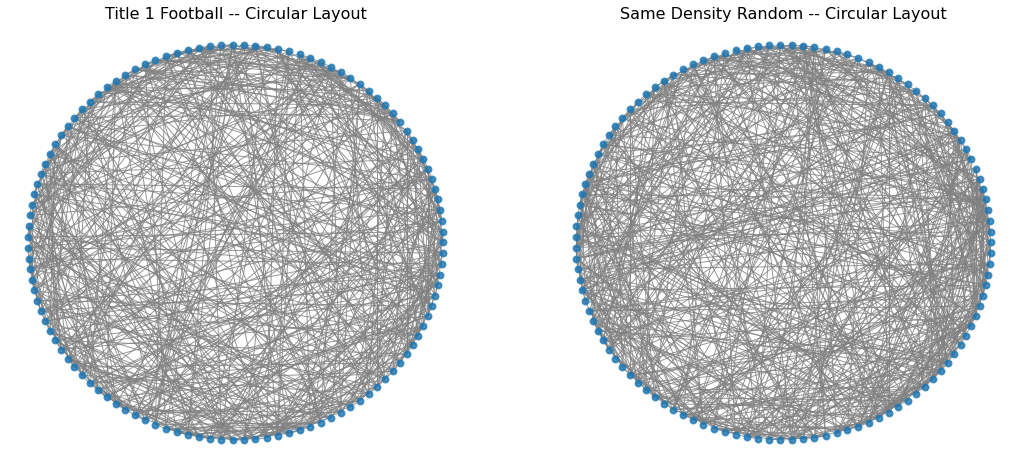

In [13]:
plt.figure(figsize = (18, 8))
ax1 = plt.subplot(121)
nx.draw_networkx(football, ax = ax1,
                 node_size=35, 
                 edge_color='gray', 
                 pos = nx.circular_layout(football),
                 with_labels=False, alpha=.8, linewidths=2)
plt.axis('off')
plt.title('Title 1 Football -- Circular Layout', size = 16)
ax2 = plt.subplot(122)
nx.draw_networkx(F_random, ax = ax2,
                 node_size=35, 
                 edge_color='gray', 
                 pos = nx.circular_layout(F_random),
                 with_labels=False, alpha=.8, linewidths=2)
plt.axis('off')
plt.title('Same Density Random -- Circular Layout', size = 16);

There is some non-random structure here, but it's not clear exactly what it is.

So we will turn to a more informative layout.

The standard `networkx` routine uses what is called a 'spring' layout. 

Here is how 'spring' layout works:
* Each edge has a `weight` parameter (could be 1 for all edges).  
* The layout routine fixes 
    * a spring of length = 1/`weight` between the nodes, and 
    * a repulsive force between each pair of nodes, 
* and then lets the set of all forces reach its minimum energy state.  

This is a kind of minimal distortion in a least-squares sense.

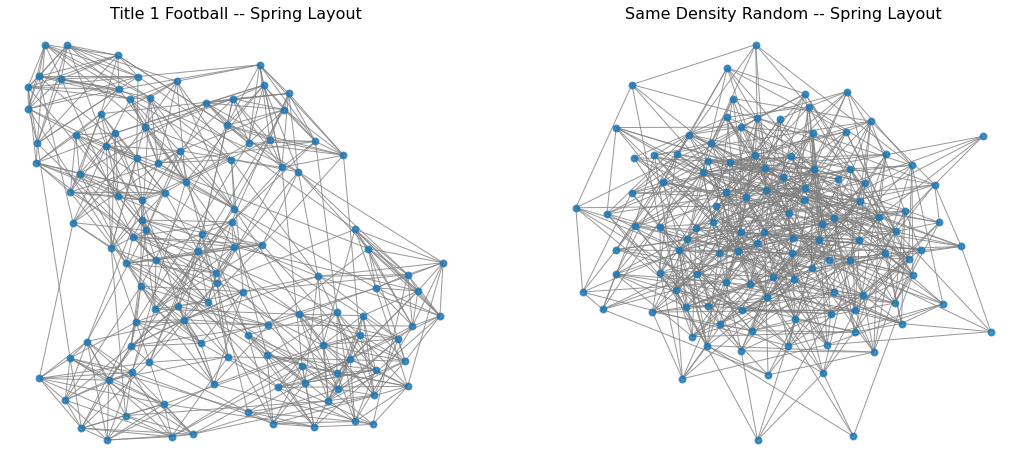

In [14]:
plt.figure(figsize = (18, 8))
ax1 = plt.subplot(121)
nx.draw_networkx(football, ax = ax1,
                 node_size=35, 
                 edge_color='gray', 
                 pos = nx.spring_layout(football, seed = 0),
                 with_labels=False, alpha=.8, linewidths=2)
plt.axis('off')
plt.title('Title 1 Football -- Spring Layout', size = 16)
ax2 = plt.subplot(122)
nx.draw_networkx(F_random, ax = ax2,
                 node_size=35, 
                 edge_color='gray', 
                 pos = nx.spring_layout(F_random, seed = 0),
                 with_labels=False, alpha=.8, linewidths=2)
plt.axis('off')
plt.title('Same Density Random -- Spring Layout', size = 16);

Notice how the spring layout tends to bring clusters of densely connected nodes close to each other.

Finally, we can try the spectral layout.

(We will define the spectral layout in the next lecture.)

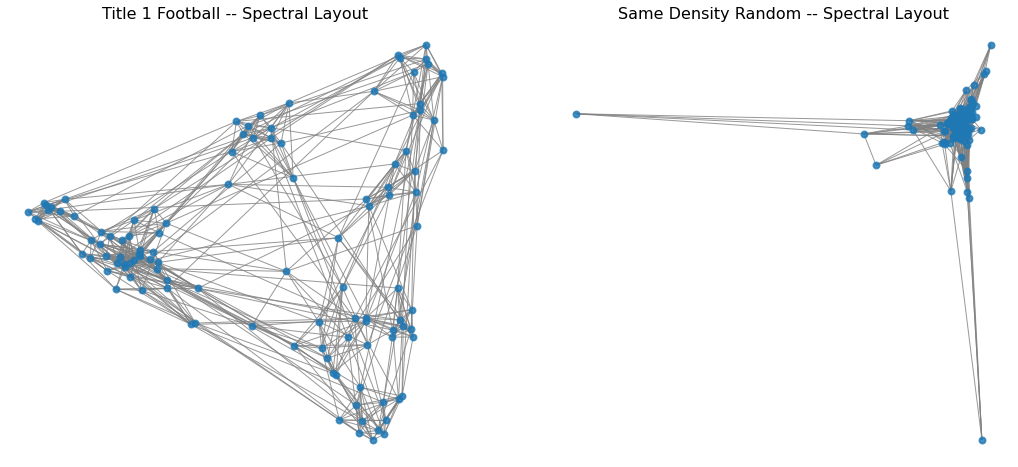

In [15]:
plt.figure(figsize = (18, 8))
ax1 = plt.subplot(121)
nx.draw_networkx(football, ax = ax1,
                 node_size=35, 
                 edge_color='gray', 
                 pos = nx.spectral_layout(football),
                 with_labels=False, alpha=.8, linewidths=2)
plt.axis('off')
plt.title('Title 1 Football -- Spectral Layout', size = 16)
ax2 = plt.subplot(122)
nx.draw_networkx(F_random, ax = ax2,
                 node_size=35, 
                 edge_color='gray', 
                 pos = nx.spectral_layout(F_random),
                 with_labels=False, alpha=.8, linewidths=2)
plt.axis('off')
plt.title('Same Density Random -- Spectral Layout', size = 16);

With this layout, we can start to understand the structure of the network --

see clusters of teams that correspond to conferences, --

and understand that there are not too many high-degree nodes.

### Characterizing Graphs

Another way to undersand network structured data is to look at important metrics.

For example, we can start with __clustering coefficient:__

In [16]:
clustering_coefficient = nx.average_clustering(football)
print(f'The clustering coefficient of the Football network is {clustering_coefficient:0.3f}')
cc_random = nx.average_clustering(F_random)
print(f'The clustering coefficient for the equivalent random network is {cc_random:0.3f}')

The clustering coefficient of the Football network is 0.403
The clustering coefficient for the equivalent random network is 0.088


Another useful metric is diameter:

In [17]:
print(f'The diameter of the Football network is {nx.diameter(football)}' +
      f' and the average shortest path length is {nx.average_shortest_path_length(football):0.3f}')
print(f'The diameter of the equivalent random network is {nx.diameter(F_random)}' +
      f' and the average shortest path length is {nx.average_shortest_path_length(F_random):0.3f}')

The diameter of the Football network is 4 and the average shortest path length is 2.508
The diameter of the equivalent random network is 4 and the average shortest path length is 2.215


The next property we can look at is the __degree distribution:__

In [18]:
degree_freq = nx.degree_histogram(football)
degrees = np.array(range(len(degree_freq)))

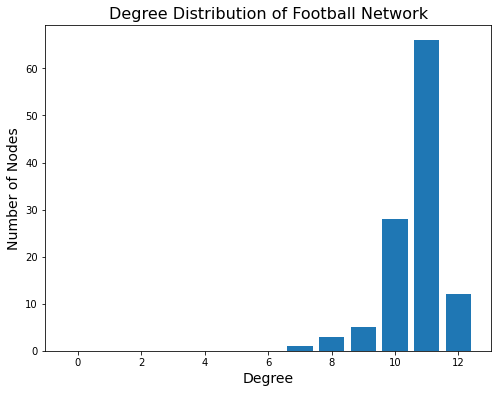

In [19]:
plt.figure(figsize = (8, 6))
plt.bar(degrees, degree_freq)
plt.xlabel('Degree', size = 14)
plt.ylabel('Number of Nodes', size = 14)
plt.title('Degree Distribution of Football Network', size = 16);

To get a sense of what is unusual here, we can again compare this to the equivalent random network:

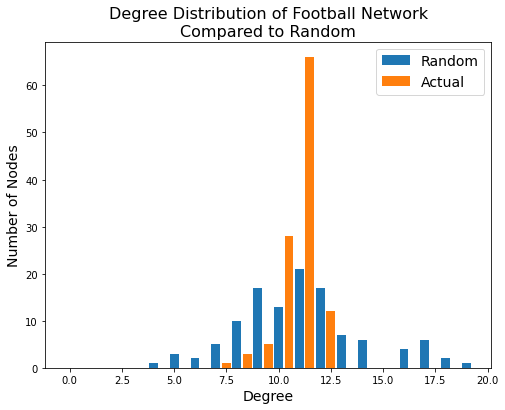

In [20]:
rand_degree_freq = nx.degree_histogram(F_random)
rand_degrees = range(len(rand_degree_freq))
plt.figure(figsize = (8, 6))
plt.bar(rand_degrees, rand_degree_freq, 0.425, label = 'Random')
plt.bar(degrees+0.5, degree_freq, 0.425, label = 'Actual')
plt.xlabel('Degree', size = 14)
plt.ylabel('Number of Nodes', size = 14)
plt.legend(loc = 'best', fontsize = 14)
plt.title('Degree Distribution of Football Network\nCompared to Random', size = 16);

We can see the evidence of scheduling of games in this distribution: a much larger number of teams plays 11 games than would occur by chance.